## K-MEANS WITH CROSS VALIDATION - MODE CLASSIFICATION

In [2]:
# Imports
import pandas as pd
import numpy as np

# Cross Validation
from sklearn.model_selection import StratifiedKFold

# Normalizacion de los datos (media=0, std=1)
from sklearn.preprocessing import StandardScaler

# Clusters
from sklearn.cluster import KMeans

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [3]:
columns = ['area','perimeter','compactness','length','width','asymmetry','groove','class']
df = pd.read_csv('seeds_dataset.txt', names=columns, delimiter='\s+')
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Visualize data

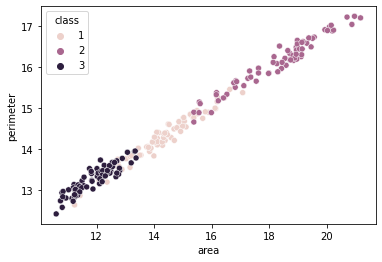

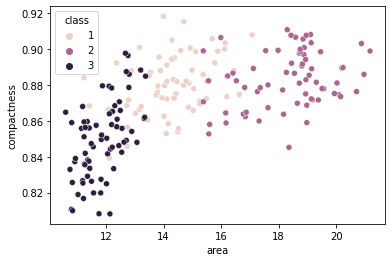

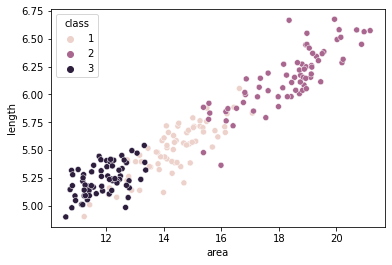

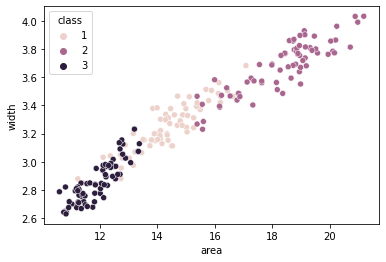

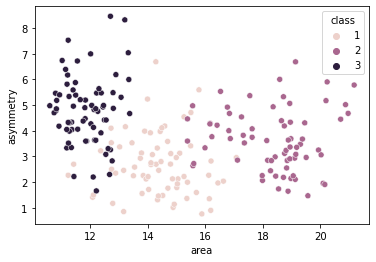

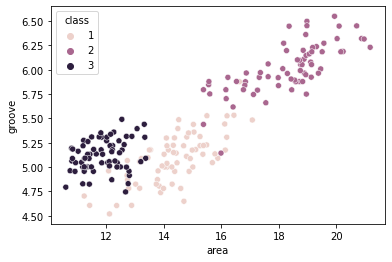

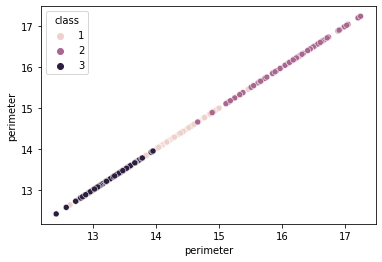

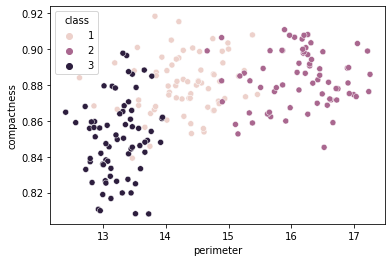

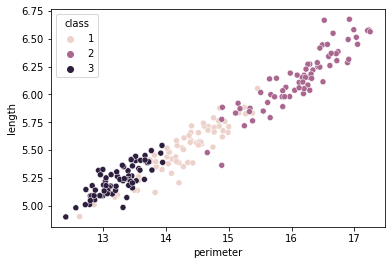

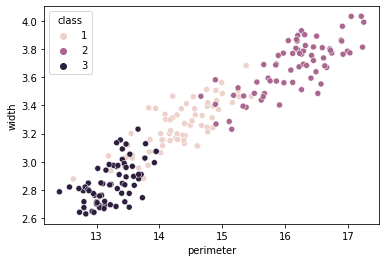

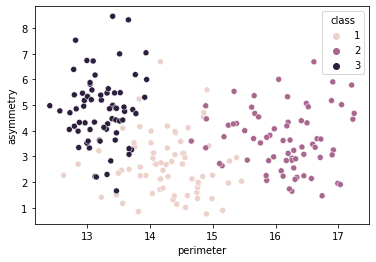

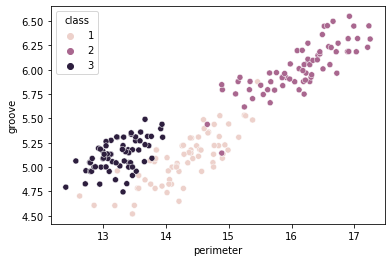

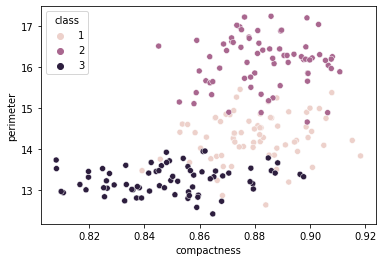

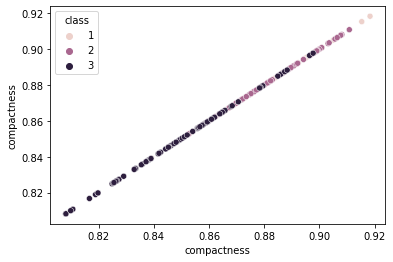

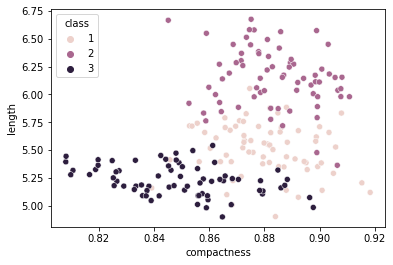

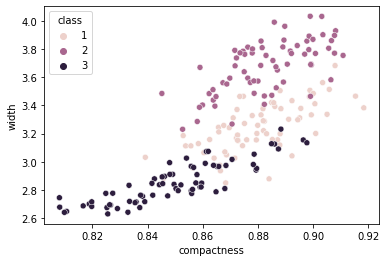

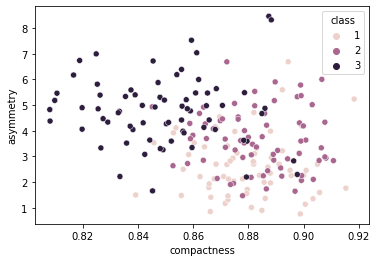

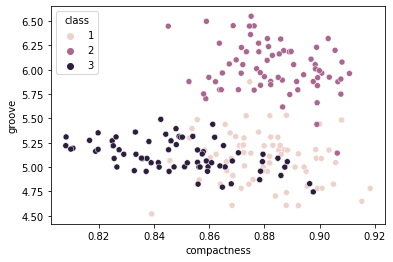

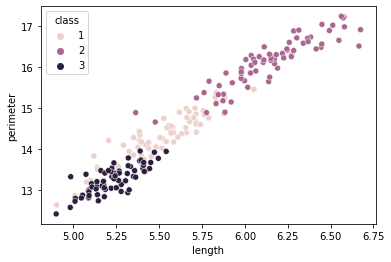

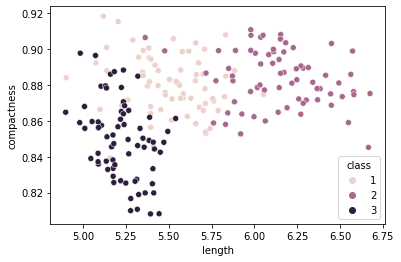

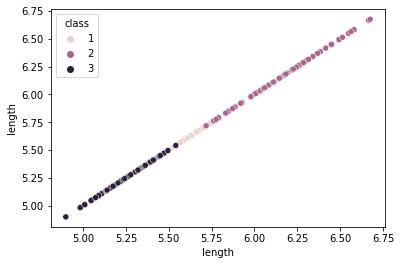

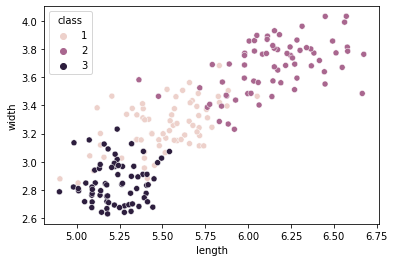

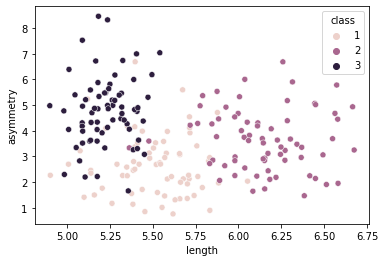

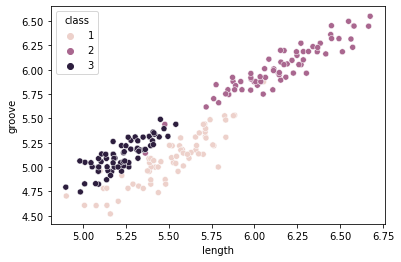

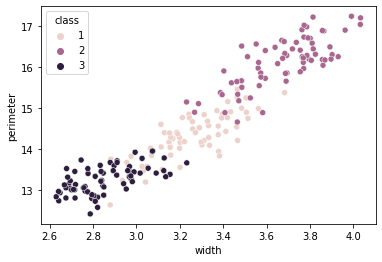

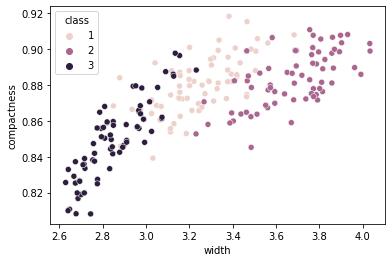

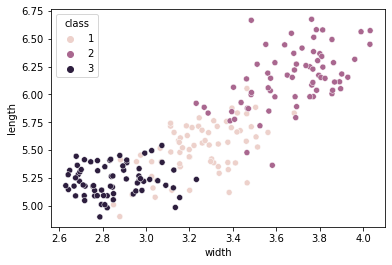

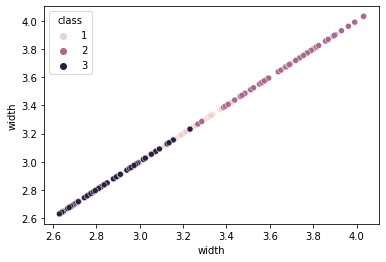

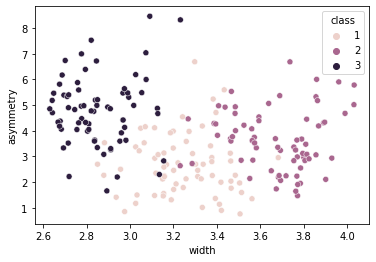

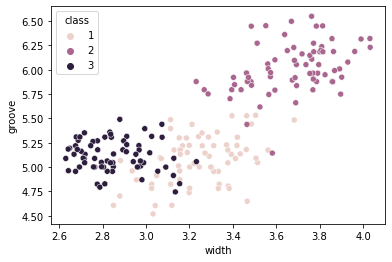

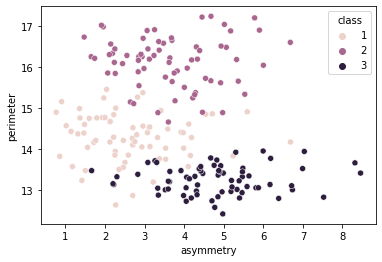

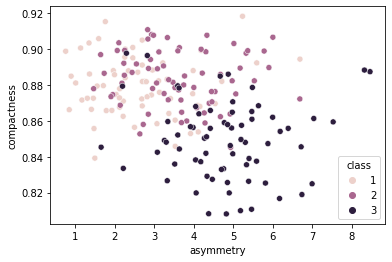

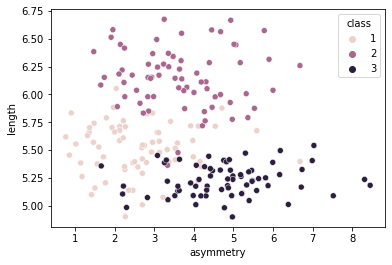

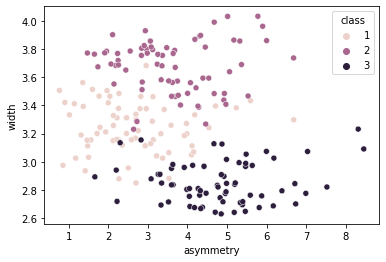

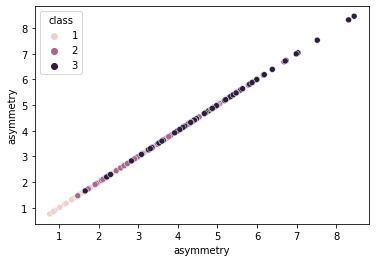

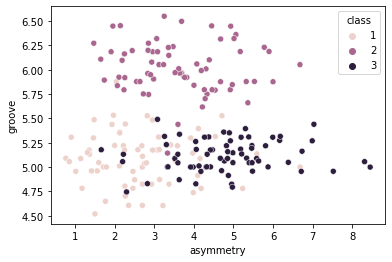

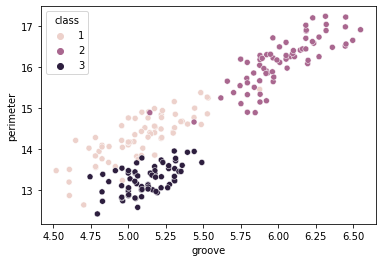

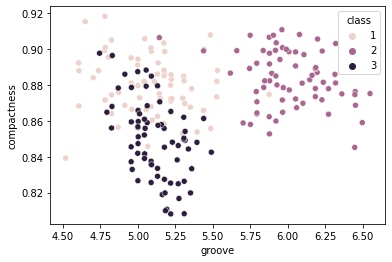

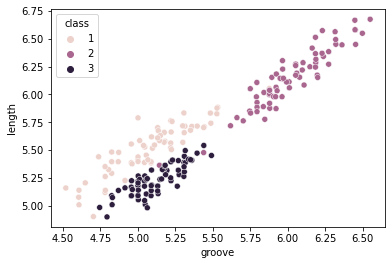

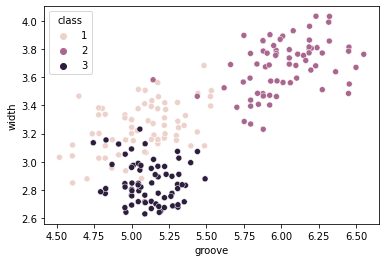

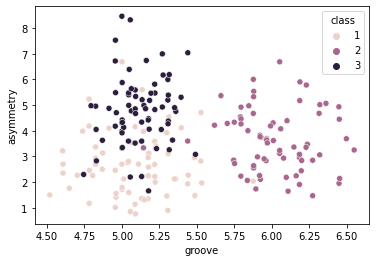

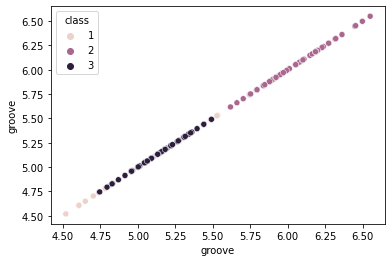

In [4]:
for i in range(len(columns)-1):
    for j in range(1, len(columns)-1):
        x_label = columns[i]
        y_label = columns[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

### Preprocessing Data

In [5]:
X = df[columns[:-1]]
X

,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [6]:
# Normalize Data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Labels
labels = df['class']
labels

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: class, Length: 210, dtype: int64

### Cross Validation (k=10)


In [7]:
K = 10
Kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=0)

### K-Means

In [8]:
min_clusters = 3
max_clusters = 20

# Columnas del DataFrame final indicando el num de clusters
num_clusters = [i for i in range(min_clusters, max_clusters+1)]

# DataFrame que contendra las tasas de acierto para cada numero de clusters por particion
final = pd.DataFrame(np.zeros((K,(max_clusters-min_clusters)+1)), columns=num_clusters)
final.columns.name = "Clusters"
final

Clusters,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
cont = 0
for i in range(min_clusters, max_clusters+1):
    # Creating the model
    model = KMeans(n_clusters=i, random_state=0)
    acc = []
    
    for data_train, data_test in Kfold.split(X_std, labels):
        # Obtenemos los datos a partir de los indices generados para el conjunto de entrenamiento
               
        # En la clasificacion por K-Means dispondemos del metodo .predict(), el cual clasifica nuevos datos sin computar
        # otra vez los nuevos clusters.
        # Por lo tanto, tenemos unas muestras para el ajuste y otras para la evaluacion.
        train = X_std[data_train]
        labels_train = labels[data_train]
        
        test = X_std[data_test]
        labels_test = labels[data_test]
        
        # Training our model
        model.fit(train)
        
        # Get labels predicted
        clusters = model.labels_
                
        # Predict a evaluar
        y_predict = model.predict(test)
        
        # Clasificacion por Moda
        moda = -1 + np.zeros((i), dtype=int)
        aciertos = 0
        
        # Computo de la moda y numero de aciertos
        for c in range(i):
            # Obtenemos la clase mayoritaria del cluster mediante el metodo np.bincount
            moda[c] = np.bincount(labels_train[clusters==c]).argmax()
            aciertos += np.sum(labels_test[y_predict==c] == moda[c])
            
                        
        accuracy = (aciertos / labels_test.shape[0])          
        acc.append(accuracy)
   
    # Escribimos en el DataFrame las accuracy obtenidas para cada particion por numero de clusters
    final.loc[:,final.keys()[cont]] = acc
    cont += 1
final

Clusters,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.904762,0.809524,0.809524,0.857143,0.857143,0.904762,0.857143,0.904762,0.904762,0.904762,0.857143,0.904762,0.809524,0.904762,0.904762,0.904762,0.904762,0.952381
1,0.904762,0.857143,1.000000,0.952381,1.000000,0.952381,0.952381,1.000000,1.000000,1.000000,0.904762,1.000000,1.000000,1.000000,1.000000,0.952381,1.000000,0.952381
2,0.857143,0.857143,0.809524,0.857143,0.857143,0.857143,0.857143,0.857143,0.952381,0.857143,0.809524,0.809524,0.809524,0.809524,0.857143,0.857143,0.857143,0.857143
3,0.904762,1.000000,0.952381,0.904762,1.000000,0.904762,0.904762,0.904762,0.952381,0.952381,0.904762,0.952381,0.904762,0.952381,0.904762,0.952381,0.952381,0.952381
4,0.904762,0.857143,0.904762,0.904762,0.904762,0.904762,0.904762,0.952381,0.952381,0.952381,0.904762,0.904762,0.857143,0.809524,0.904762,0.857143,0.904762,0.904762
5,1.000000,0.952381,0.809524,0.857143,0.952381,0.809524,0.857143,0.904762,0.857143,0.857143,0.857143,0.904762,0.904762,1.000000,0.952381,0.952381,0.904762,0.904762
6,0.666667,0.809524,0.809524,0.761905,0.761905,0.714286,0.857143,0.761905,0.714286,0.761905,0.761905,0.761905,0.714286,0.761905,0.761905,0.761905,0.714286,0.761905
7,1.000000,0.952381,0.904762,0.952381,0.952381,1.000000,1.000000,0.952381,0.904762,0.904762,0.952381,0.904762,0.857143,0.952381,0.904762,0.857143,0.904762,0.857143
8,0.952381,0.952381,0.857143,0.904762,0.952381,0.904762,0.809524,0.857143,0.904762,0.952381,0.952381,1.000000,1.000000,0.952381,1.000000,0.952381,0.904762,0.857143
9,0.857143,0.761905,0.952381,0.809524,0.904762,0.904762,0.952381,0.809524,0.904762,1.000000,0.952381,0.952381,0.809524,0.904762,0.761905,0.952381,0.904762,0.952381


### Validacion Cruzada (k=10)

In [10]:
final.mean()

Clusters
3     0.895238
4     0.880952
5     0.880952
6     0.876190
7     0.914286
8     0.885714
9     0.895238
10    0.890476
11    0.904762
12    0.914286
13    0.885714
14    0.909524
15    0.866667
16    0.904762
17    0.895238
18    0.900000
19    0.895238
20    0.895238
dtype: float64

In [11]:
cluster_optimo = final.columns[final.mean(axis=0).argmax()]
print("Numero de cluster optimo = ", cluster_optimo, " con tasa de acierto = ", final.mean(axis=0).max())

Numero de cluster optimo =  7  con tasa de acierto =  0.9142857142857144


### Bar Chart

In [12]:
x = num_clusters
y = final.mean()

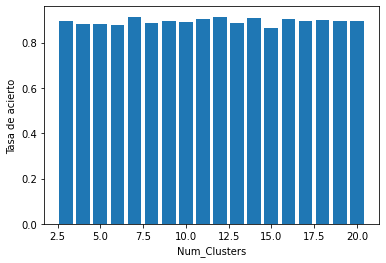

In [13]:
plt.figure()
plt.bar(x,y)
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()